# Итоговый проект: fashion-MNIST

**В качестве итогового проекта предлагается решить задачу классификации на наборе данных Fashion-MNIST, который доступен по ссылке:**

- https://www.kaggle.com/zalando-research/fashionmnist

**Fashion-MNIST – это датасет состоящий из 70000 черно-белых изображений одежды 28х28 пикселей каждое. 60000 из них содержатся в тренировочной выборке, и 10000 – в тестовой. Этот набор данных представляет из себя альтернативу обычному датасету рукописных цифр MNIST.**

**Данный проект является учебным и его цель – научиться работать с различными моделями машинного обучения. Необязательно строить самую лучшую модель и получать лучшее качество на тестовых данных. Самое важное – это научиться обучать модели и анализировать полученные результаты. В результате, вы научитесь использовать и подготавливать данные для решения задачи классификации. Так же вы изучите на практике различные алгоритмы машиного обучения, такие как логистическая регрессия, полносвязные нейронные сети и сверточные нейронные сети.**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from sklearn import metrics, model_selection

import tensorflow as tf

**Загрузим данные, нормализуем `x_train` и `x_test` путем деления числового значения каждого пикселя на 255, представим `y_train` и `y_test` в виде one-hot вектора с помощью `tf.keras.utils.to_categorical`:**

In [3]:
data_train = pd.read_csv('drive/My Drive/coursera/fashion-mnist_train.csv') 
#data_train = pd.read_csv('fashion-mnist_train.csv') 
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
x_train = data_train.drop('label', axis=1).values
y_train = data_train.label.values

In [5]:
data_test = pd.read_csv('drive/My Drive/coursera/fashion-mnist_test.csv') 
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
x_test = data_test.drop('label', axis=1).values
y_test = data_test.label.values

In [0]:
labels = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, 'T-shirt/top')

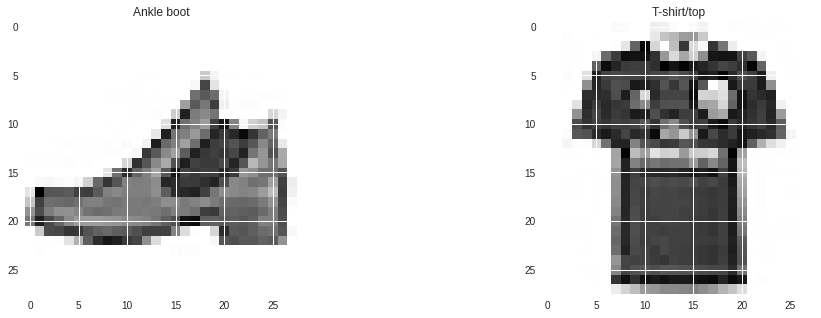

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5))
axes[0].imshow(x_train[1].reshape(28, 28))
axes[0].set_title(labels[y_train[1]])
axes[1].imshow(x_test[0].reshape(28, 28))
axes[1].set_title(labels[y_test[0]])

In [0]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [0]:
x_train = x_train.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
x_val = x_val.astype('float32') / 255
y_val = tf.keras.utils.to_categorical(y_val)

In [0]:
# general parameters
input_shape = x_train.shape[1]
number_objects = y_train.shape[0]
number_classes = y_train.shape[1]

lr = 0.1 # learning_rate
epochs = 30
batch_size = 128

In [0]:
def plot_results(accuracy_train, accuracy_test, loss_train, loss_test):
  
  fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

  axes[0].plot(range(epochs), accuracy_train, 'bo-', label='обучение')
  axes[0].plot(range(epochs), accuracy_test, 'rs-', label='валидация')
  axes[0].set_ylabel('Доля верных ответов (accuracy)')
  axes[0].set_xlabel('Эпоха')
  axes[0].legend()

  axes[1].plot(range(epochs), loss_train, 'bo-', label='обучение')
  axes[1].plot(range(epochs), loss_test, 'rs-', label='валидация')
  axes[1].set_ylabel('Функция потерь (loss)')
  axes[1].set_xlabel('Эпоха')
  axes[1].legend()

## Логистическая регрессия

**Логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев.**

**Используйте стохастический градиентный спуск в качестве алгоритма оптимизации. В выходном слое количество нейронов равно количеству классов; в качестве функции активации выходного слоя следует использовать `softmax`.**

**Обучите логистическую регрессию на обучающей выборке и оцените качество на тестовой выборке используя метрику `accuracy`. Постройте график качества модели на тестовой выборке от количества эпох.** 

In [0]:
tf.keras.backend.clear_session()
tf.random.set_random_seed(0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(number_classes, input_shape=(input_shape,), activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(lr), metrics=['accuracy'])

In [0]:
log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.


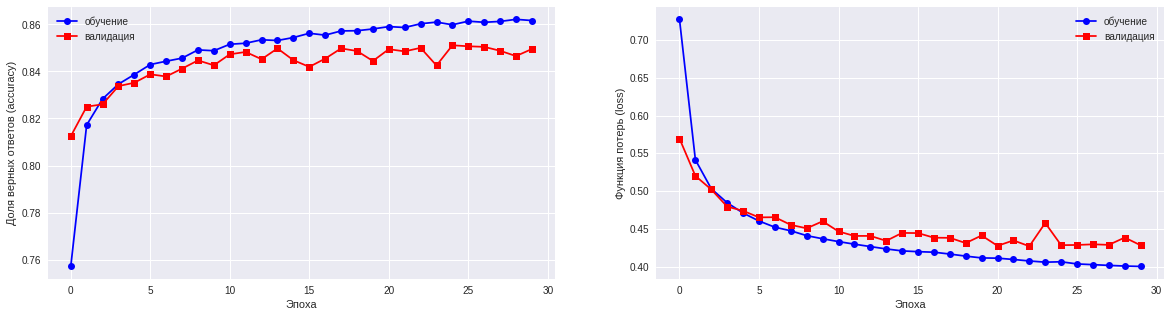

In [0]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

In [0]:
print('Итоговая доля верных ответов на валидации: {:.2f}%'.format(model.evaluate(x_val, y_val, verbose=0)[1]*100))

model.summary()

Итоговая доля верных ответов на валидации: 84.95%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Полносвязная нейронная сеть

**В этой части задания необходимо реализовать полносвязную нейронную сеть, которая будет состоять из нескольких скрытых слоев с количеством нейронов равным 256 и функцией активации ReLU. Количество нейронов в выходном слое равно количеству классов; в качестве функции активации нужно использовать `softmax`, в качестве функции потерь - `categorical_crossentropy`, оптимизатор - `Adadelta` (документация Keras рекомендует оставлять параметры по умолчанию), метрика - `accuracy`.**

In [0]:
tf.keras.backend.clear_session()
tf.random.set_random_seed(0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(input_shape,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(number_classes, activation='softmax'))

model._make_predict_function()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

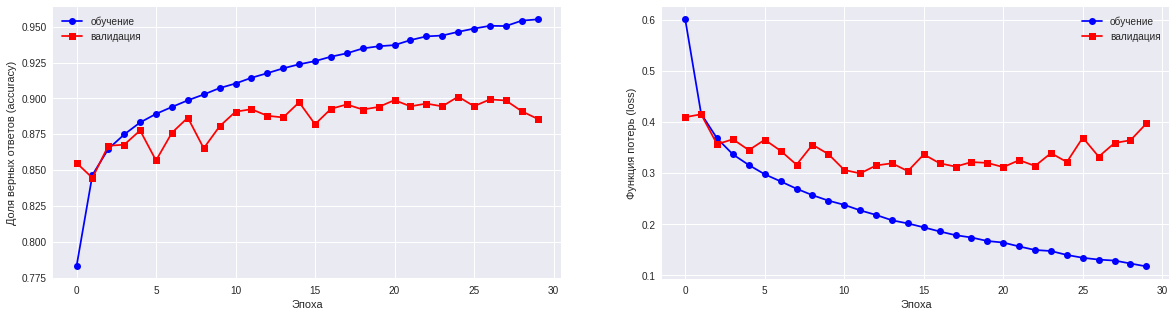

In [0]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

In [0]:
print('Итоговая доля верных ответов на валидации: {:.2f}%'.format(model.evaluate(x_val, y_val, verbose=0)[1]*100))

model.summary()

Итоговая доля верных ответов на валидации: 88.57%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


**Видим, что полносвязная нейронная сеть показывает более высокое качество классификации по сравнению с логистической регрессией (повышение на ~3.6%), что обусловлено более сложной структурой сети, которая может восстанавливать более сложные зависимости в данных. В то же время видим и то, что данная сеть переобучается - функция потерь на валидации немного увеличивается с увеличением количества эпох.**

## Сверточная нейронная сеть

**В этой части задания необходимо реализовать сверточную нейронную сеть.**

**Начните с модели с несколькими сверточными слоями. Рекомендуется использовать слои суб-дискретизации, например MaxPooling. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.**

**Далее, попробуйте увеличить количество слоев в нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируйте, как изменилось качество в этом случае.**

**В заключение, рекомендуется попробовать добавить BatchNormalization. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей.**

**В начале  преобразуем `x_train` и `x_test` в форму, ожидаемую сверточной нейронной сетью (размер изображения 28х28, единица обозначает один цветовой канал):**

In [0]:
x_train_cnn = x_train.reshape(-1,28,28,1)
x_val_cnn = x_val.reshape(-1,28,28,1)

In [0]:
tf.keras.backend.clear_session()
tf.random.set_random_seed(0)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten()) # connection (transform from 2D array to 1D array) between the convolution and dense layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
log = model.fit(x_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val_cnn, y_val))

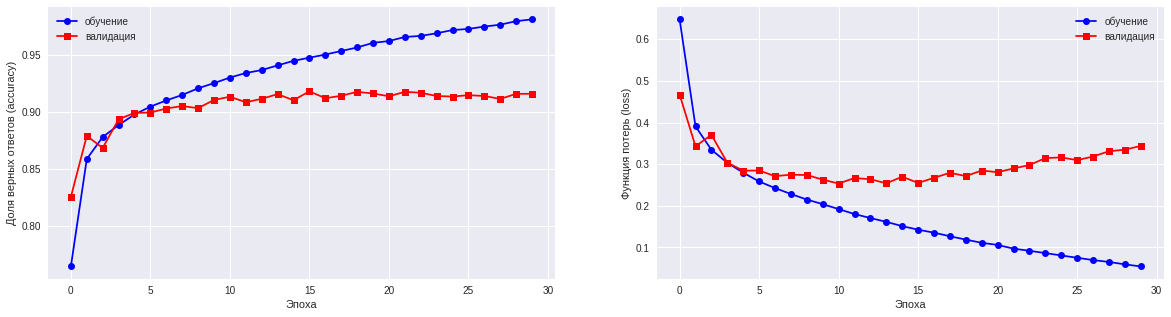

In [0]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

In [0]:
print('Итоговая доля верных ответов на валидации: {:.2f}%'.format(model.evaluate(x_val_cnn, y_val, verbose=0)[1]*100))

model.summary()

Итоговая доля верных ответов на валидации: 91.57%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)           

**Видим, что сверточная нейронная сеть показывает более высокое качество классификации по сравнению с полносвязной сетью (повышение на ~3.0%), что по-видимому обусловлено использованием сверточных слоев, предназначенных для обработки (извлечения признаков) изображений. В то же время видим и то, что данная сеть переобучается - функция потерь на валидации увеличивается с увеличением количества эпох.**

**Усложним нейронную сеть, добавив дополнительные сверточные слои:**

In [0]:
tf.keras.backend.clear_session()
tf.random.set_random_seed(0)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Convolution2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten()) # connection (transform from 2D array to 1D array) between convolution and dense layers

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
log = model.fit(x_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val_cnn, y_val))

Итоговая доля верных ответов на валидации: 92.11%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)         

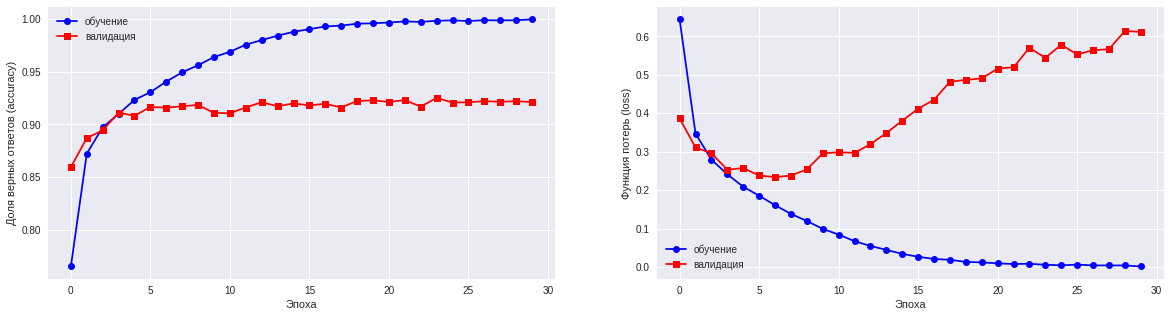

In [0]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

print('Итоговая доля верных ответов на валидации: {:.2f}%'.format(model.evaluate(x_val_cnn, y_val, verbose=0)[1]*100))

model.summary()

**Видим, что добавление дополнительных сверточных слоев привело к небольшому увеличению качества ~0.5%, в то же время нейронная сеть сильно переобучается, что видно на диаграмме функции потерь.**

**Добавим в нейронную сеть слои `BatchNormalization` и проанализируем качество итоговой сети:**

In [14]:
tf.keras.backend.clear_session()
tf.random.set_random_seed(0)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3))
model.add(tf.keras.layers.BatchNormalization()) # BN generally used between linear and non-linear layers
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Convolution2D(filters=128, kernel_size=3))
model.add(tf.keras.layers.BatchNormalization()) #
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten()) # connection (transform from 2D array to 1D array) between convolution and dense layers

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization()) #
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [16]:
log = model.fit(x_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val_cnn, y_val))

Instructions for updating:
Use tf.cast instead.


Итоговая доля верных ответов на валидации: 93.40%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_v1 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)         

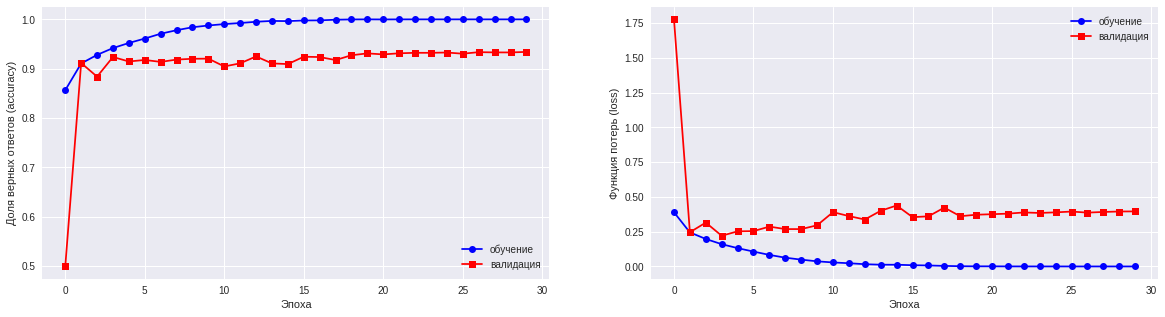

In [17]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

print('Итоговая доля верных ответов на валидации: {:.2f}%'.format(model.evaluate(x_val_cnn, y_val, verbose=0)[1]*100))

model.summary()

In [18]:
target_names = ['{}'.format(labels[i]) for i in range(number_classes)]
predictions = np.argmax(model.predict(x_val_cnn), axis=1)
test_labels = np.argmax(y_val, axis=1)

print(metrics.classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.89      0.89      1200
     Trouser       0.99      0.99      0.99      1200
    Pullover       0.90      0.89      0.89      1200
       Dress       0.93      0.95      0.94      1200
        Coat       0.89      0.92      0.90      1200
      Sandal       0.99      0.98      0.98      1200
       Shirt       0.84      0.79      0.81      1200
     Sneaker       0.97      0.98      0.97      1200
         Bag       0.98      0.99      0.98      1200
  Ankle boot       0.98      0.98      0.98      1200

   micro avg       0.93      0.93      0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



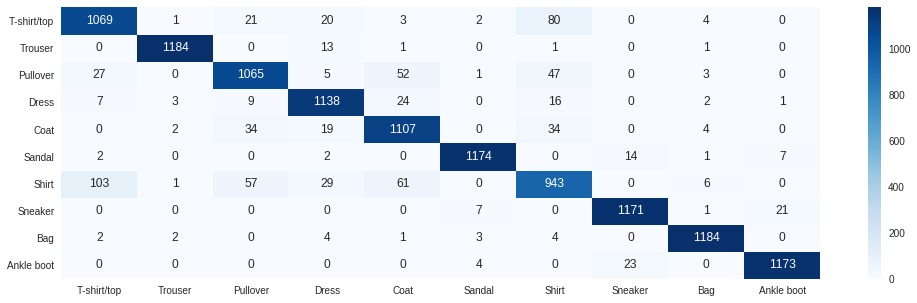

In [19]:
cm = metrics.confusion_matrix(test_labels, predictions)

fig, ax = plt.subplots(figsize=(17,5)) 
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=ax)

Text(0.5, 1.0, 'Predicted: Pullover\nClass: Shirt')

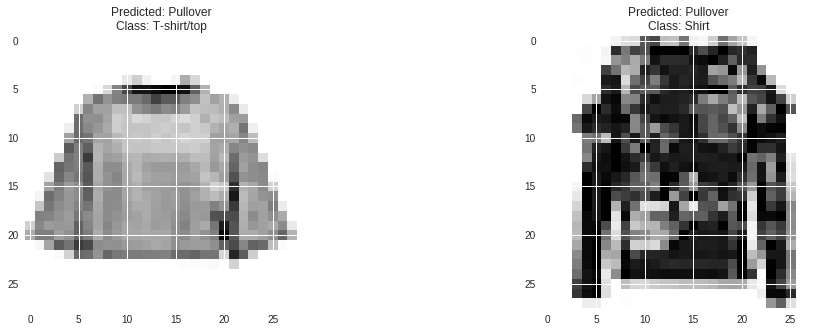

In [20]:
incorrect = np.where(test_labels != predictions)[0]

fig, axes = plt.subplots(ncols=2, figsize=(17, 5))

axes[0].imshow(x_val[incorrect[10]].reshape(28, 28))
axes[0].set_title('Predicted: {}\nClass: {}'.format(labels[predictions[incorrect[10]]], labels[test_labels[incorrect[10]]]))
axes[1].imshow(x_val[incorrect[20]].reshape(28, 28))
axes[1].set_title('Predicted: {}\nClass: {}'.format(labels[predictions[incorrect[20]]], labels[test_labels[incorrect[20]]]))

**Таким образом, добавление `BatchNormalization` позволило повысить точность классификации до 93.4%, что на  1.3% выше по сравнению с нейронной сетью без данных слоев. Наибольшее количество ошибок в категории Shirt. При этом также уменьшилась степень переобучения, что видно на диаграмме функции потерь.**